
# Project: Medical Appointment No Shows Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Brief  Description
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of 
whether or not patients show up for their appointment.
### Purpose of the Analysis  
<ul>
    <li> What are the percentages of patients' attendance to scheduled appointments ?
    <li> How much does the medical state of patients factor in their attendance ?
    <li> Does a specific gender of patients attend more than the other ?
    <li> What is the average age of attendees and absentees ?
    <li> How much of patients with scholarships attend thier appointments ?
    <li> What is the effect of receiving SMS on patients' attendance ?
</ul>

In [1]:
from pandas import read_csv, to_datetime
from  matplotlib.pyplot import pie, bar, xlabel, ylabel, title, legend, figure, axis, xticks
from numpy import int64
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
#Load dataset and inspect first five instances 
df = read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Dataset brief description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Dataset brief statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# The 'Age' seems to have incosistent negative values, assuming 0 age as babies having just months
df_neg = df.query('Age < 0')
df_neg

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [6]:
# The 'Handcap' seems to have incosistent values rather than 1's and 0's
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [7]:
# The 'ScheduledDay', 'AppointmentDay' and 'PatientId' seems to have inconsistent datatype
print(df['ScheduledDay'].dtype, df['AppointmentDay'].dtype, df['PatientId'].dtype)

object object float64


In [8]:
# Check for duplicates 
df.duplicated().sum()

0

### Data Cleaning
#### Dealing with Inconsistent Values 

In [9]:
# Removing the 'Age' row having negative value
df.drop(df.query('Age < 0').index, inplace = True)
# Check
df_neg = df.query('Age < 0')
df_neg

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [10]:
# Removing the 'Handcap' rows having values rather than 1's and 0's
df.drop(df.query('Handcap not in {}'.format([0, 1])).index, inplace = True)
# Check
df['Handcap'].value_counts()

0    108285
1      2042
Name: Handcap, dtype: int64

#### Dealing with Inconsistent data types

In [11]:
# convert the type of  PatientId from float to int
df['PatientId'] = df['PatientId'].apply(int64)

In [12]:
# convert the type of ScheduledDay fro string to datetime 
df['ScheduledDay'] = to_datetime(df['ScheduledDay'])

In [13]:
# convert the type of ScheduledDay fro string to datetime 
df['AppointmentDay'] = to_datetime(df['AppointmentDay'])

<a id='eda'></a>
## Exploratory Data Analysis

In [14]:
def pie_chart (df, col_name, labels):
    """
    Plot pie chart for a given data as a column of a given dataframe 

    Args:
        (dataframe) df - name of the dataframe contains data to be plot
        (series) col_name - name of the column in the df that conatins the data
        (list) labels - name of the list of strings of labels to label the pie chart's portions
    Returns:
        None
    """
    
    # plot dimensions 
    figure(figsize = [10, 6])
    # select data to plot according to the gievn column's structure
    if col_name == 'No-show':
        col_data = df['No-show'].value_counts()
    
    elif col_name == 'Gender':
        col_data = df.groupby('No-show')['Gender'].value_counts().unstack('Gender').sum()
    
    else:
        col_data = df.groupby('No-show')[col_name].value_counts().unstack(col_name).iloc[:,1]
    # pie chart
    col_data.plot.pie(autopct='%1.1f%%', colors = ['orange', 'blue'], labels = labels)
    # plot titles 
    title('Attendance by {}'.format(col_name).title(), fontsize = 14, weight = 'bold')
    ylabel('')
    # center pie chart
    axis('equal')

In [15]:
# replace values of 'No-show' with direct meaning to avoid ambiguity
df['No-show'].replace({"No" : "Show", "Yes" : "No Show"}, inplace = True)

### What are the percentages of patients' attendance to scheduled appointments ?

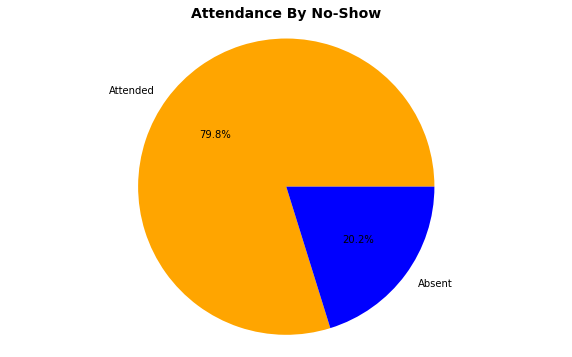

In [16]:
# pie chart for percentages of attnedess and absentees
labels = ['Attended', 'Absent']
pie_chart(df, 'No-show', labels)

**The problem statement to be analysed is that only 79.8 % of patients attend their appointments whereas 20.2 % are absent**

### How much does the medical state of patients factor in their attendance ?

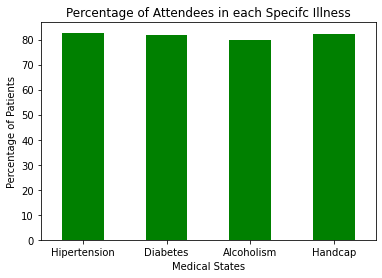

In [17]:
# bar plot of percentages of attendance of patients with each illness
df.groupby('No-show')[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']].sum().apply(lambda val: val*100/val.sum()).loc['Show'].plot.bar(color = 'green', rot = 0)
title("Percentage of Attendees in each Specifc Illness")
xlabel("Medical States")
ylabel("Percentage of Patients");

**Patients suffering Hipertension are the most patients who are more likely to attend their appointments with percentage of 82.74 %, then handcap, diabetes, alcoholism patients with percenatges of 82.1 %, 82 % and 79.86 % respectively**

### Does a specific gender of patients attend more than the other ?

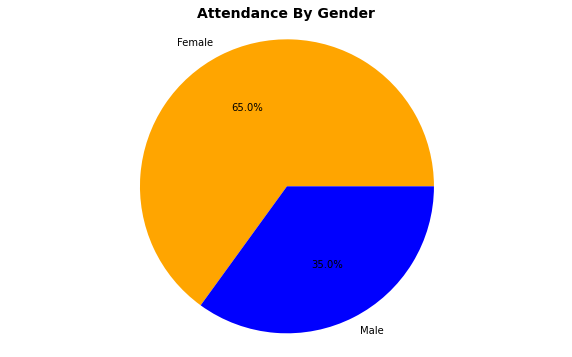

In [18]:
# pie chart for female patients vs male patients percentages
labels = ['Female', 'Male']
pie_chart(df, 'Gender', labels)

**Females seem to take care of their health more than males, 65 % of applying patients are females whereas 35 % are males**

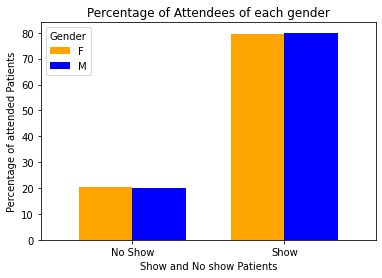

In [19]:
# plotting percentges of both the female and male show and no show patients
df.groupby(['Gender', 'No-show']).size().unstack('Gender').apply(lambda val: val*100/val.sum()).plot.bar(color = ['orange', 'blue'], rot = 0, width = 0.7);
title("Percentage of Attendees of each gender")
xlabel("Show and No show Patients")
ylabel("Percentage of attended Patients");

**Males and females have approximatley equal percentage of actual attending thier appointments with percentages of 80.02 % and 79.69 % respectively**

### What is the average age of attendees and absentees ?

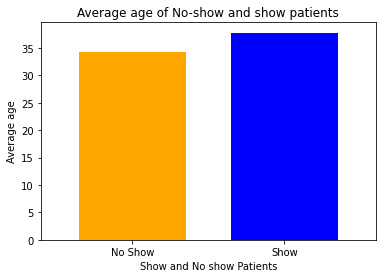

In [20]:
# bar chart for average age of attendees and absentees 
df.groupby('No-show').mean()['Age'].plot.bar(color = ['orange', 'blue'], rot = 0, width = 0.7);
title("Average age of No-show and show patients")
xlabel("Show and No show Patients")
ylabel("Average age");

**Patients at their end of their thirties are in more need for attending their appointments than those in their start of thirties, the average age for attendees is approximately 38 whereas for absentees is 34**

### How much of patients with scholarships attend thier appointments ?

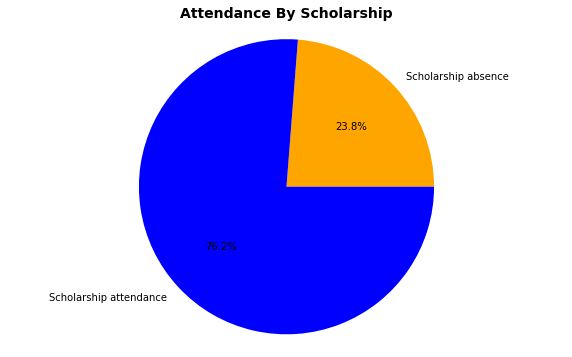

In [21]:
# pie chart for scholarship attendance and absence
labels = ['Scholarship absence', 'Scholarship attendance']
pie_chart(df, 'Scholarship', labels)

**Paying for appointments is not the only obstacle in showing up, 76.2 % of people having scholarship attend thier appointments whereas the rest 23.8 % don't**

### What is the effect of receiving SMS on patients' attendance ?

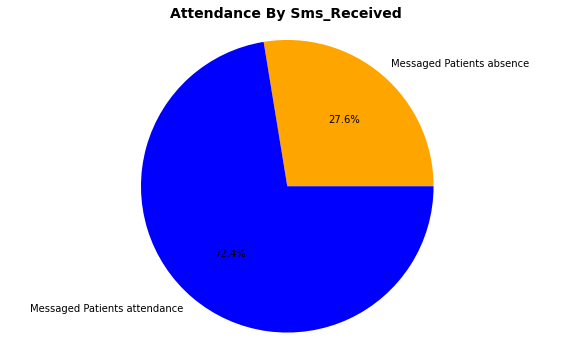

In [22]:
# pie chart for patients who received SMS attendance and absence
labels = ['Messaged Patients absence', 'Messaged Patients attendance']
pie_chart(df, 'SMS_received', labels)

**Around one third of the patients who received SMS don't attend, direct phone calls with patients may be more effective**

<a id='conclusions'></a>
## Conclusions
<ul>
    <li> Limitations :
    <ul>
    <li> A limitation of this study is that the sample represents 35 % males and 65 % females, these percentages don't represent the actual brazilian population at 2016 which is the time at which the dataset is collected -the actual percentages don't change till the time of this analysis in 2021- which is 49.2 % males and 50.8 females, this makes the dataset not representative to the population and make limitations in generalizing on the whole population, source : <a href = https://data.worldbank.org/indicator/SP.POP.TOTL.MA.IN?locations=BR> brazilian population along many years </a></li> 
    <li> Another limitation is that about 200 rows in the sample are dropped, one sample for having negative age, and 199 samples for having inconsistent values for Handcap rather than 0 and 1, actually these 200 rows can have neglected effect on our analysis as they represent about 0.2 % from our 110,527 samples</li> </ul>
    <li> Summary of results :
        <ul>
            <li> 79.8 % of patients attend their appointments whereas 20.2 % are absent
            <li> Patients suffering Hipertension are the most patients who are more likely to attend their appointments with percentage of 82.74 %
            <li> In spite of having 65 % of applying patients are females and only 35 % are males, they have approximatley equal percentage of actual attending thier appointments with percentages of 80.02 % and 79.69 % respectively
            <li> Direct phone calls with patients may be more effective than SMS
        </ul>
</ul>  